In [10]:
from keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input
from keras.preprocessing import image
import requests
from io import BytesIO
from PIL import Image
import numpy as np

In [2]:
model = ResNet50(weights = "imagenet")

Instructions for updating:
Colocations handled automatically by placer.
102858752/102853048 [==============================] - 99s 1us/step


In [8]:
url_img = "https://proxy.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.tapetus.pl%2Fobrazki%2Fn%2F131198_szary-kot.jpg&f=1"
response = requests.get(url_img)
img = Image.open(BytesIO(response.content))
img = img.resize((224, 224)) # it's a ResNet50 constrain size

![](https://proxy.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.tapetus.pl%2Fobrazki%2Fn%2F131198_szary-kot.jpg&f=1)

In [14]:
# convert image to array
X = image.img_to_array(img)
X = np.expand_dims(X, axis = 0) # model needs 4 dimensions
X.shape

(1, 224, 224, 3)

In [15]:
y_pred = model.predict(X)

In [16]:
decode_predictions(y_pred, top = 5)

40960/35363 [==================================] - 0s 4us/step


[[('n02124075', 'Egyptian_cat', 0.47413334),
  ('n02127052', 'lynx', 0.12302018),
  ('n02123045', 'tabby', 0.10263538),
  ('n02123159', 'tiger_cat', 0.059243076),
  ('n02123597', 'Siamese_cat', 0.045062922)]]

Let's try another image:

![](https://proxy.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.agrofoto.pl%2Fforum%2Fuploads%2Fgallery%2Fcategory_314%2Fmed2_traktor-samorobka_203227_314_389255.jpg&f=1)

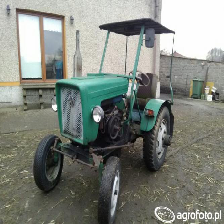

In [21]:
url_img_t = "https://www.agrofoto.pl/forum/uploads/gallery/category_314/med2_traktor-samorobka_203227_314_389255.jpg"
response_t = requests.get(url_img_t)
img_t = Image.open(BytesIO(response_t.content))
img_t = img_t.resize((224, 224))
img_t

In [22]:
X_t = image.img_to_array(img_t)
X_t = np.expand_dims(X_t, axis = 0)
y_pred_t = model.predict(X_t)
decode_predictions(y_pred_t, top = 5)

[[('n03777568', 'Model_T', 0.5190387),
  ('n04465501', 'tractor', 0.33010077),
  ('n04428191', 'thresher', 0.04669308),
  ('n04482393', 'tricycle', 0.024201192),
  ('n03967562', 'plow', 0.023394605)]]